In [ ]:
# Chapter 11. Model Evaluation

In [1]:
# 11.1 Cross-Validating Models
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


# load digits datasets
digits = datasets.load_digits()

# create feature and target matrix
features = digits.data
target = digits.target

# create scandalizer
standardizer = StandardScaler()

# create logistic regression object
logit = LogisticRegression()

# create a pipeline than standardizes , then runs logistic regression
pipeline = make_pipeline(standardizer, logit)

# create k fold cross validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# conduct k fold cross validation
cv_results = cross_val_score(pipeline,
                             features,
                             target,
                             cv=kf,              # performance metric
                             scoring="accuracy", # loss function
                             n_jobs=-1)         # use all cpu cores

cv_results.mean()

np.float64(0.9677329000309502)

In [2]:
cv_results

array([0.96111111, 0.95833333, 0.97771588, 0.96935933, 0.97214485])

In [ ]:
# diffrence between tain test and k fold cross validation
from sklearn.model_selection import train_test_split

# create training and test sets
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                             target,
                                                                             test_size=0.1,
                                                                             random_state=1)

# fit standardizer tp training set
standardizer.fit(features_train)

features_train_std = standardizer.transform(features_train)
features_test_std = standardizer.transform(features_test)

# -----------------------------------------------------------------
# create a pipeline
pipeline = make_pipeline(standardizer, logit)

# do k fold cross validation
cv_results = cross_val_score(pipeline,
                             features,
                             target,
                             cv=kf,
                             scoring="accuracy",
                             n_jobs=-1)

In [8]:
# 11.2 Creating a Baseline Regression Model
from sklearn.datasets import load_wine
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

wine = load_wine()

features, target = wine.data, wine.target
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            random_state=0)

# create a dummy regressor
dummy = DummyRegressor(strategy='mean')

# train dummy regressor
dummy.fit(features_train, target_train)

# get r squared error
dummy.score(features_test, target_test)

-0.0480213580840978

In [9]:
from sklearn.linear_model import LinearRegression

# train simple linear regression
ols = LinearRegression()
ols.fit(features_train, target_train)

ols.score(features_test, target_test)

0.8043532631769537

In [ ]:
# create dummy regressor that predict 1s for everything
 
clf = DummyRegressor(strategy='constant', constant=1)

clf.fit(features_train, target_train) 
clf.score(features_test, target_test)

-0.06299212598425186

In [11]:
# 11.3 Creating a Baseline Classification Model

from sklearn.datasets import load_iris
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

iris = load_iris()

features, target = iris.data, iris.target

# split into tain and test sets
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            random_state=0)
dummy = DummyClassifier(strategy='uniform', random_state=1)

# train model
dummy.fit(features_train, target_train)

# get accuracy score
dummy.score(features_test, target_test)


0.42105263157894735

In [12]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier()

# train model
classifier.fit(features_train, target_train)

# get accuracy score
classifier.score(features_test, target_test)

0.9736842105263158

In [19]:
# 11.4 Evaluating Binary Classifier Predictions
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000,
                           n_features=3,
                           n_informative=3,
                           n_redundant=0,
                           n_classes= 2,
                           random_state=1)

# create logistic regression
logit = LogisticRegression()

# cross validate model using accuracy
cross_val_score(logit, X, y, scoring='accuracy')


array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [21]:
cross_val_score(logit, X, y, scoring='precision')

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [22]:
cross_val_score(logit, X, y, scoring='recall')

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [23]:
cross_val_score(logit, X, y, scoring='f1')

array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.1,
                                                    random_state=1)

# Predict values for training target vector
y_hat = logit.fit(X_train, y_train).predict(X_test)

accuracy_score(y_test, y_hat)

0.947

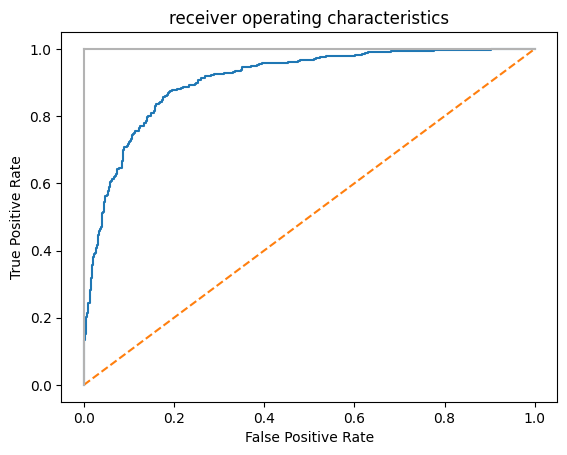

In [40]:
# 11.5 Evaluating Binary Classifier Thresholds
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

features, target = make_classification(n_samples=10000,
                                       n_features=10,
                                       n_classes=2,
                                       n_informative=3,
                                       random_state=3)

# split into tain and test set
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target,
                                                                            test_size=0.1,
                                                                            random_state=1)
# create classifier
logit = LogisticRegression()

# train mode
logit.fit(features_train, target_train)

# get predicted probabilities
target_probabilities = logit.predict_proba(features_test)[:,1]

# create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(target_test, target_probabilities)

# plot ROC curve
plt.title("receiver operating characteristics")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1], ls="--")
plt.plot([0,0], [1,0], c=".7")
plt.plot([1,1], c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()


In [41]:
logit.predict_proba(features_test)[0:1]

array([[0.8689235, 0.1310765]])

In [42]:
logit.classes_

array([0, 1])

In [43]:
print("Threshold:", threshold[124])
print("True Positive Rate:", true_positive_rate[124])
print("False Positive Rate:", false_positive_rate[124])

Threshold: 0.4981509475208573
True Positive Rate: 0.8367346938775511
False Positive Rate: 0.1627450980392157


In [45]:
print("Threshold:", threshold[49])
print("True Positive Rate:", true_positive_rate[49])
print("False Positive Rate:", false_positive_rate[49])

Threshold: 0.8058635463651345
True Positive Rate: 0.5653061224489796
False Positive Rate: 0.052941176470588235
